In [40]:
from activations import Activations
from errors import Errors
import numpy as np
from collections import OrderedDict
from layers import Relu, Sigmoid, Affine, SoftmaxWithLoss
from two_layer_net_with_back_prop import TwoLayerNetWithBackProp
import matplotlib.pyplot as plt
import cv2
import mnist
import urllib.request
import gzip
import pickle
import os

### Load MNIST dataset

In [29]:
my_mnist = mnist.Mnist()


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [30]:
(x_train, y_train), (x_test, y_test) = my_mnist.load()


## Define your two layer network

In [31]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)


In [32]:
iterations = 10000
train_size = x_train.shape[0]
batch_size = 16
lr = 0.01

iter_per_ecoph = max(train_size/batch_size, 1)

In [33]:
x_train.shape


(60000, 784)

In [34]:
train_losses = []
train_accs = []
test_accs = []

### Train your two layer network

In [35]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    # back prop
    grads = network.gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.06475, 0.0668
train acc, test_acc : 0.89345, 0.8982
train acc, test_acc : 0.9145166666666666, 0.9172


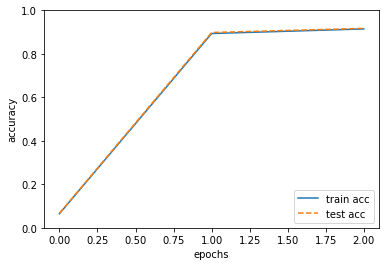

In [36]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### Let's test our neural network on handwritten digits